In [2]:
import matplotlib.pyplot as plt
import json
import os

# Model size

In [18]:
dir_open = open('../benchmark/model_size.json', "r")
model_sizes = json.load(dir_open)

In [19]:
model_sizes

{'GPT2-medium_sparsity_0%': 1377.5430603027344,
 'GPT2-medium_sparsity_10.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_50.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_90.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_95.0%': 1377.5430603027344,
 'GPT2-medium_sparsity_99.0%': 1377.5430603027344,
 'BART-large_sparsity_0%': 1549.87890625,
 'BART-large_sparsity_10.0%': 1549.87890625,
 'BART-large_sparsity_50.0%': 1549.87890625,
 'BART-large_sparsity_90.0%': 1549.87890625,
 'BART-large_sparsity_95.0%': 1549.87890625,
 'BART-large_sparsity_99.0%': 1549.87890625,
 'BERT-large_sparsity_0%': 1272.51171875,
 'BERT-large_sparsity_10.0%': 1272.51171875,
 'BERT-large_sparsity_50.0%': 1272.51171875,
 'BERT-large_sparsity_90.0%': 1272.51171875,
 'BERT-large_sparsity_95.0%': 1272.51171875,
 'BERT-large_sparsity_99.0%': 1272.51171875}

In [11]:
model_names = ['GPT2-medium', 'BART-large', 'BERT-large']
sparsity = [0, 0.1, 0.5, 0.9, 0.95, 0.99] 

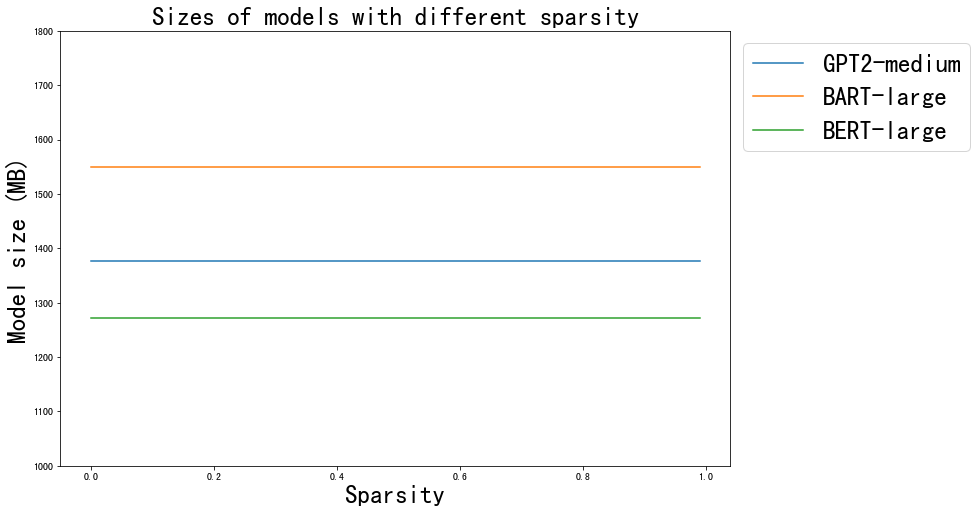

In [16]:
fig, ax = plt.subplots(figsize=(12,8))
for model_name in model_names: 
    sizes = []
    for prune_proportion in sparsity:
        sizes.append(model_sizes[f'{model_name}_sparsity_{prune_proportion*100}%'])
    ax.plot(sparsity, sizes, label=f'{model_name}') 
plt.xlabel("Sparsity", fontsize=25)
plt.ylabel("Model size (MB)", fontsize=25)
plt.ylim([1000, 1800])
plt.title("Sizes of models with different sparsity", fontsize=25)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=25)
plt.savefig('../figs/model_size_different_sparsity.png')
plt.show()
    
        
    

# Benchmarks

In [21]:
model_names = ['GPT2-medium', 'BART-large', 'BERT-large']
sparsity = [0, 0.1, 0.5, 0.9, 0.95, 0.99] 
tasks = ['clm', 'glue']

In [23]:
store_folder = '../benchmark'
benchmark_results = {}
for model_name in model_names:
    benchmark_results[model_name] = {}
    for task in tasks:
        benchmark_results[model_name][task] = []
        for prune_proportion in sparsity:
            dir_open = open(f'{store_folder}/{model_name}_{task}_sparsity_{prune_proportion*100}_results.json', "r")
            benchmark_results[model_name][task].append(json.load(dir_open))

In [24]:
benchmark_results

{'GPT2-medium': {'clm': [{'train': {'train_runtime': 110.742,
     'train_samples_per_second': 45.15,
     'train_steps_per_second': 1.418,
     'total_flos': 1160875868160000.0,
     'train_loss': 3.322981718998806,
     'epoch': 1.0},
    'eval': {'eval_loss': 3.1961748600006104,
     'eval_runtime': 5.2556,
     'eval_samples_per_second': 152.22,
     'eval_steps_per_second': 4.757,
     'epoch': 1.0}},
   {'train': {'train_runtime': 109.5983,
     'train_samples_per_second': 45.621,
     'train_steps_per_second': 1.433,
     'total_flos': 1160875868160000.0,
     'train_loss': 3.3252757856041004,
     'epoch': 1.0},
    'eval': {'eval_loss': 3.197718620300293,
     'eval_runtime': 5.2515,
     'eval_samples_per_second': 152.336,
     'eval_steps_per_second': 4.761,
     'epoch': 1.0}},
   {'train': {'train_runtime': 109.5326,
     'train_samples_per_second': 45.648,
     'train_steps_per_second': 1.433,
     'total_flos': 1160875868160000.0,
     'train_loss': 3.7891468606936702,
 

In [110]:
def plot_benchmark_results(benchmark_results, model_names, sparsity, benchmark, mode):
    '''
    benchmark == 'clm' or 'glue'
    mode = 'loss' 'accuracy' or 'runtime'. accuracy is only available in glue
    '''
    assert benchmark in ['clm', 'glue']
    assert mode in ['loss','accuracy', 'runtime']
    fig, ax = plt.subplots(figsize=(12,8))
    for model_name in model_names:
        results = []
        for model_results in benchmark_results[model_name][benchmark]:
            if mode == 'loss':
                    results.append(model_results['eval']['eval_loss'])
            elif mode == 'accuracy':
                    results.append(model_results['eval']['eval_accuracy'])
            else:
                results.append(model_results['train']['train_runtime'])
        ax.plot(sparsity, results, label=f'{model_name}') 
    plt.xlabel("Sparsity", fontsize=25)
    plt.xticks(sparsity)
    plt.ylabel(f"{mode}", fontsize=25)
    plt.title(f"Model performance on {benchmark} ", fontsize=25)
    plt.legend(fontsize=18)
    plt.savefig(f'../figs/performance_{benchmark}_{mode}.png')
    plt.show()

## CLM

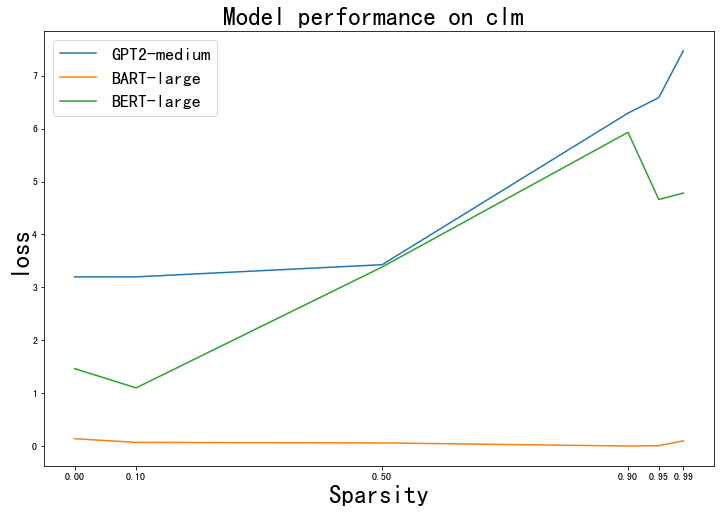

In [111]:
plot_benchmark_results(benchmark_results, 
                       model_names, 
                       sparsity, 
                       'clm', 
                       'loss')

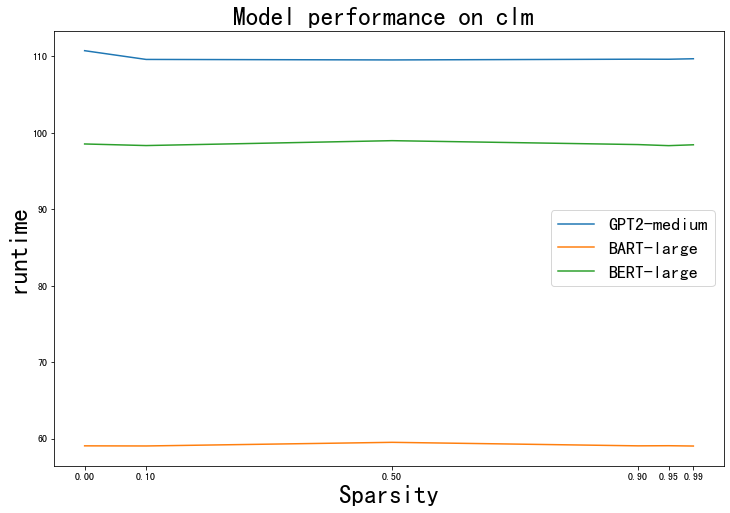

In [112]:
plot_benchmark_results(benchmark_results, 
                       model_names, 
                       sparsity, 
                       'clm', 
                       'runtime')

## GLUE(qnli)

This subdatasest tests whether the moel is capable of distinguishing the answer is entailment to the question or not. 

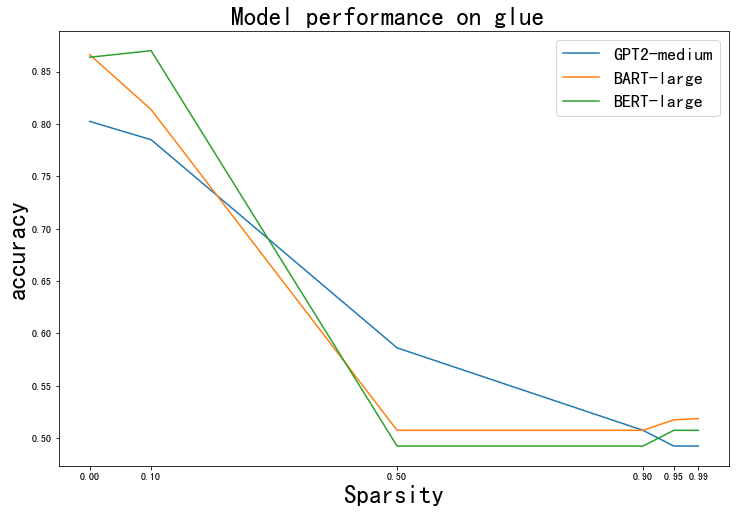

In [113]:
plot_benchmark_results(benchmark_results, 
                       model_names, 
                       sparsity, 
                       'glue', 
                       'accuracy')

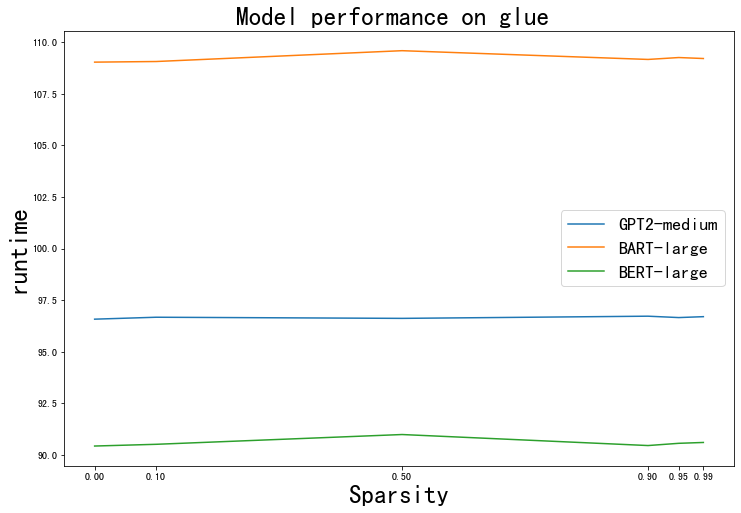

In [114]:
plot_benchmark_results(benchmark_results, 
                       model_names, 
                       sparsity, 
                       'glue', 
                       'runtime')